In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [79]:
df=pd.read_csv('WineQuality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [80]:
df.shape

(1599, 12)

We have 1599 rows and 12 columns

In [81]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Their are 0 null values in the dataset

In [82]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


We can see that dataset contains Dupliacte rows. To improve the accuracy of the model we will be required to remove the duplicacy in the dataset

In [83]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All attributes are of float type except the target attribute quality

In [84]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can observe that max value of residual sugar and roral sulfur dioxide is way greater than 75% value

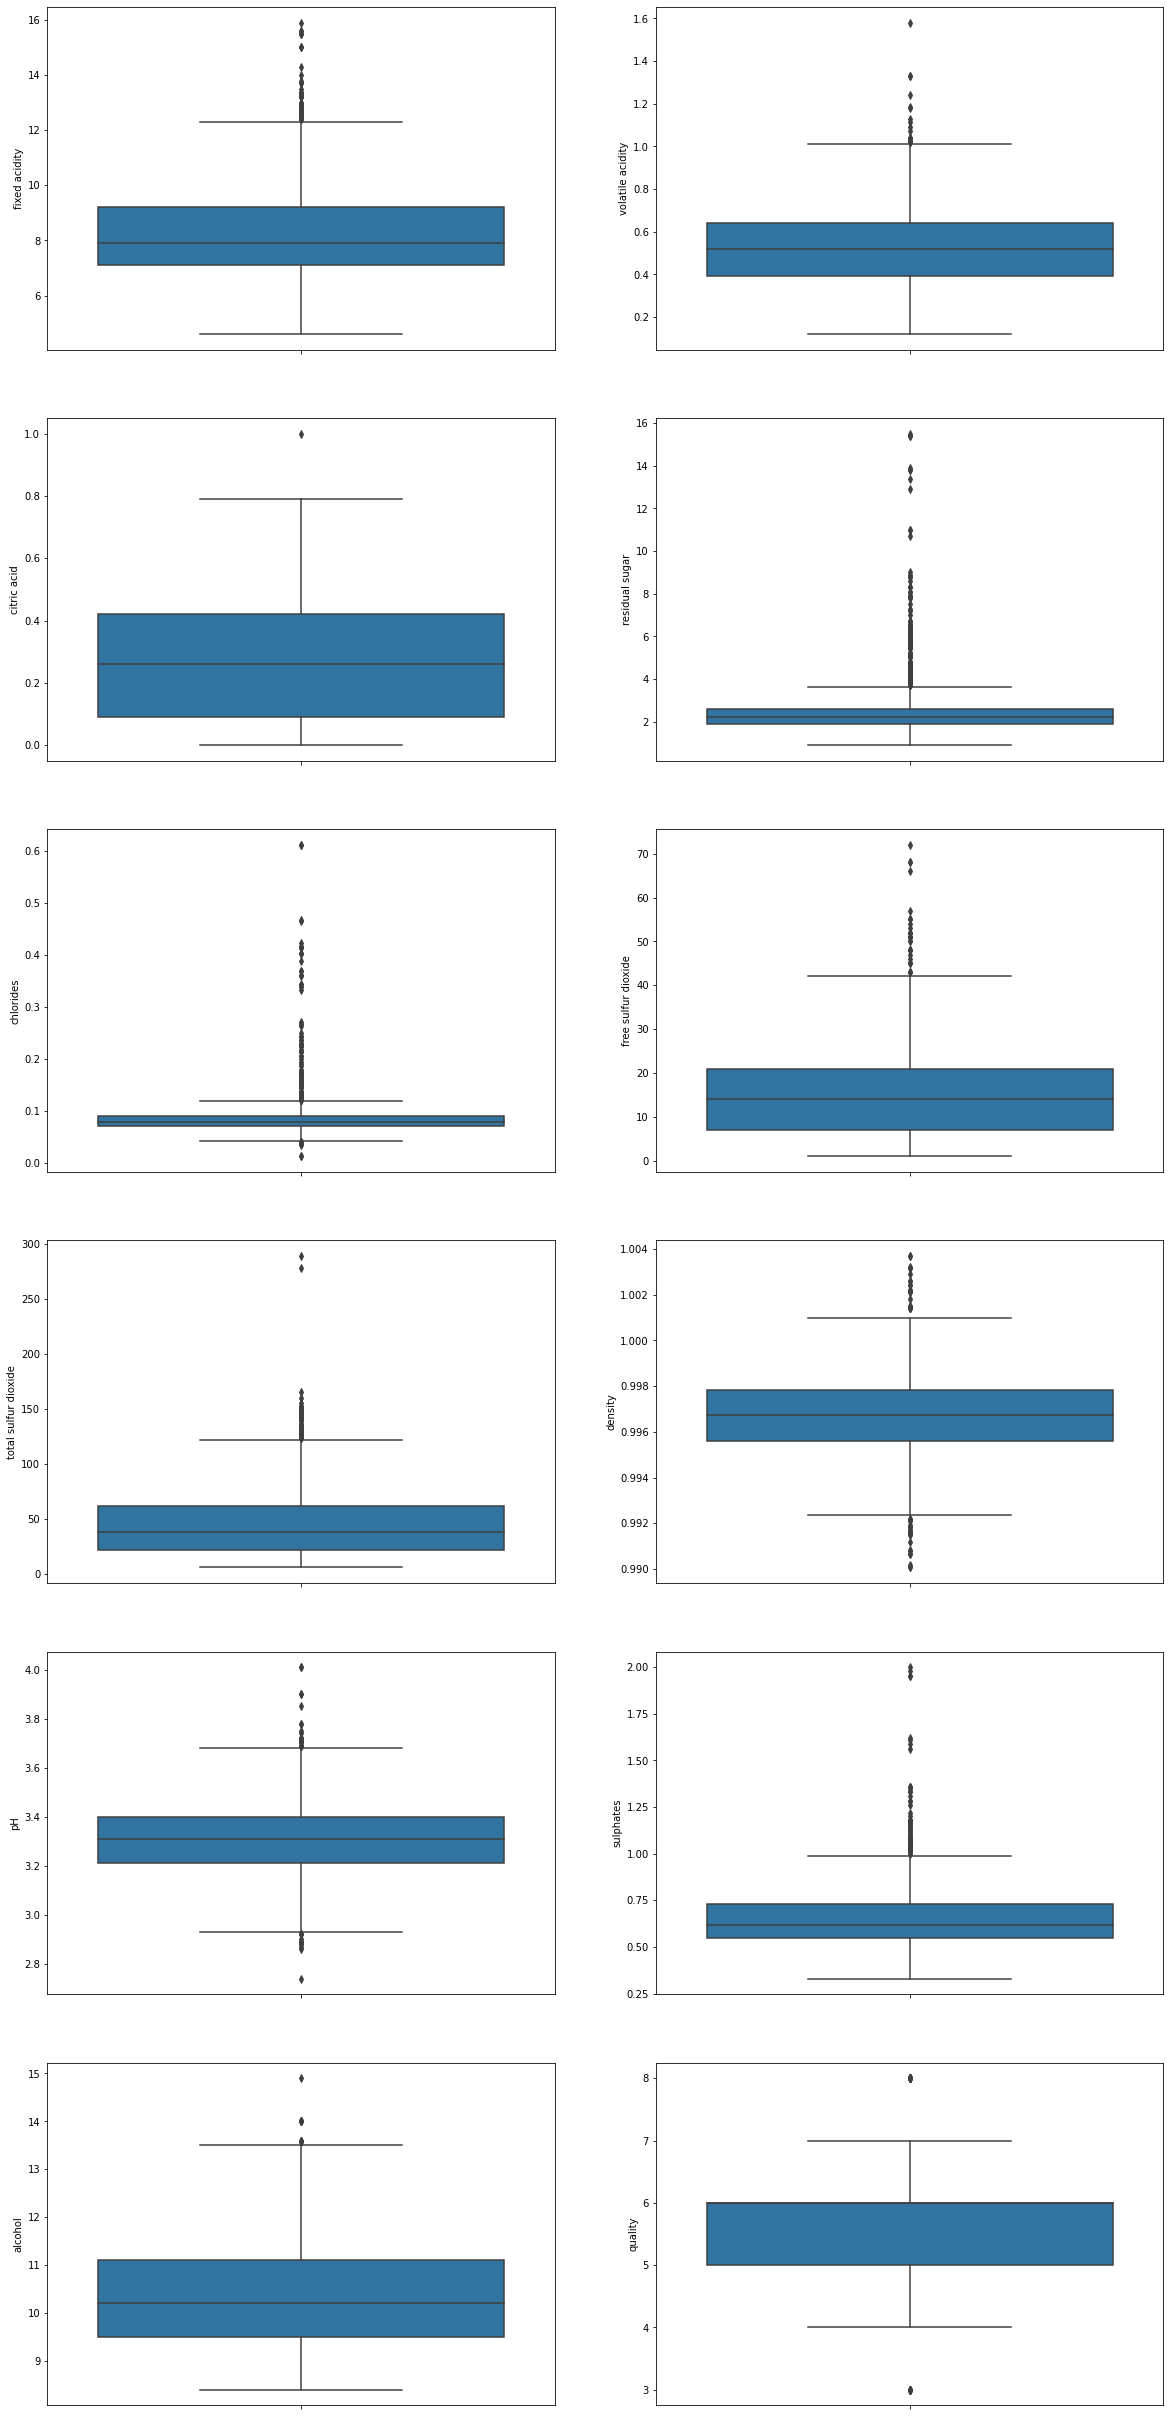

In [85]:
import seaborn as sns

counter=1;
plt.figure(figsize=(20,150))
for column in df.columns:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.boxplot(y=column,hue=column,data=df)

Outliers are present in 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'

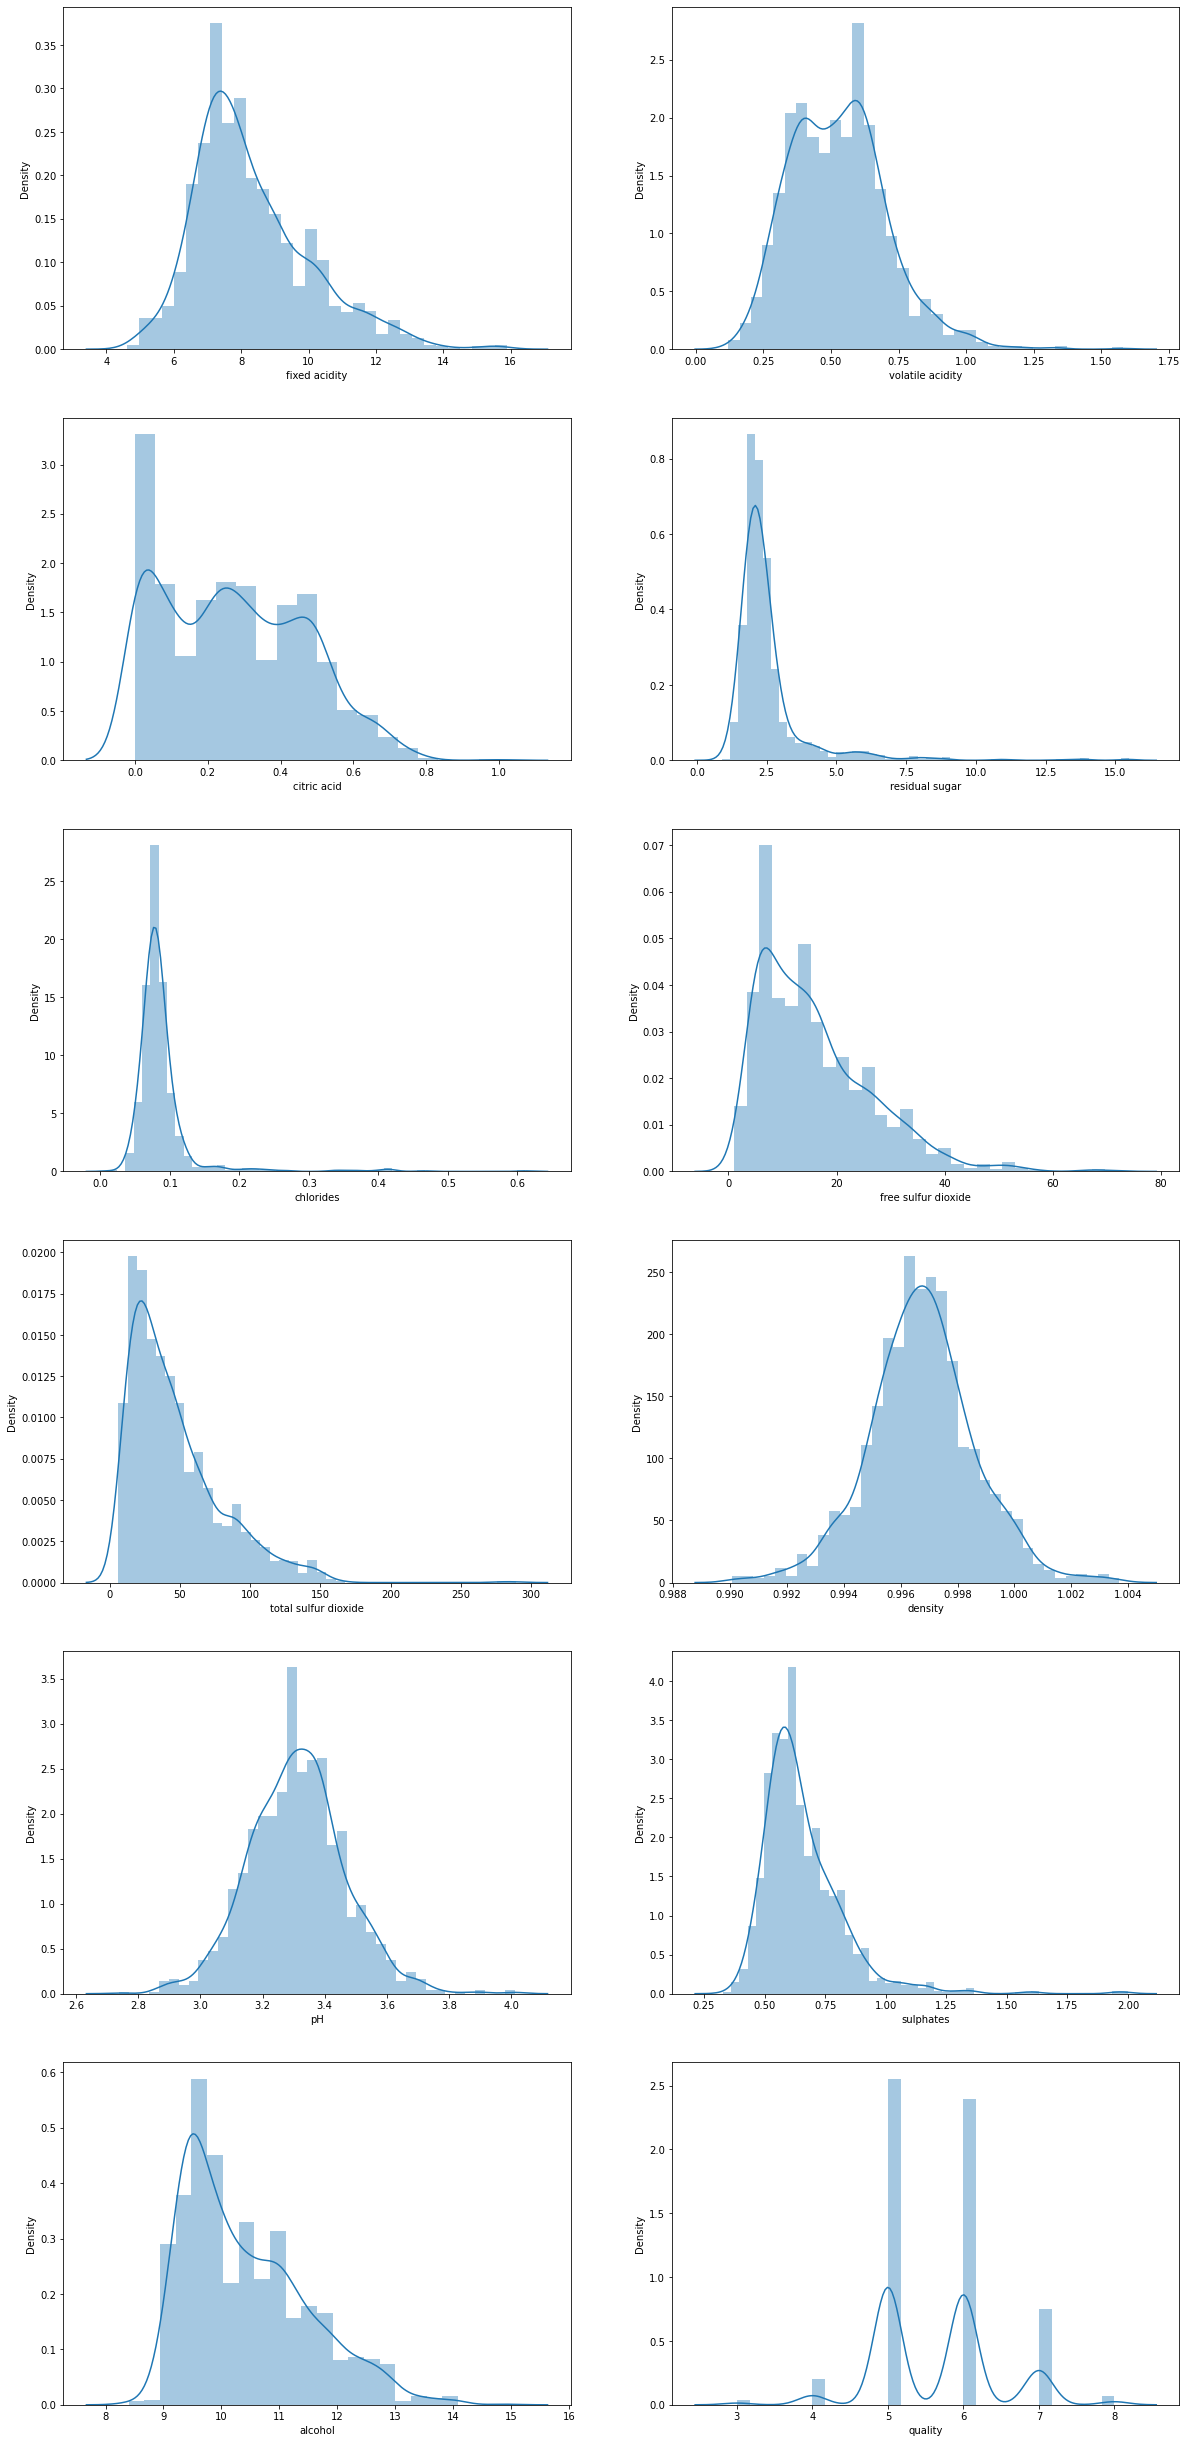

In [86]:
plt.figure(figsize=(20,150))
for column in df.columns:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.distplot(df[column])

volaitle acidity, citric acid, quality is not normally disrtibuted

(array([ 10.,  53., 681., 638., 199.,  18.]),
 array([3.        , 3.83333333, 4.66666667, 5.5       , 6.33333333,
        7.16666667, 8.        ]),
 <BarContainer object of 6 artists>)

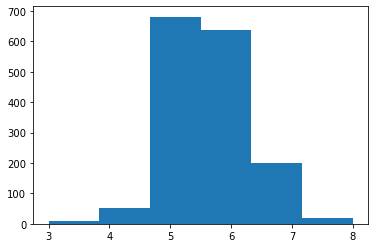

In [87]:
plt.hist(df['quality'],bins=6)

The target variable data is Highly unbalanced

<AxesSubplot:>

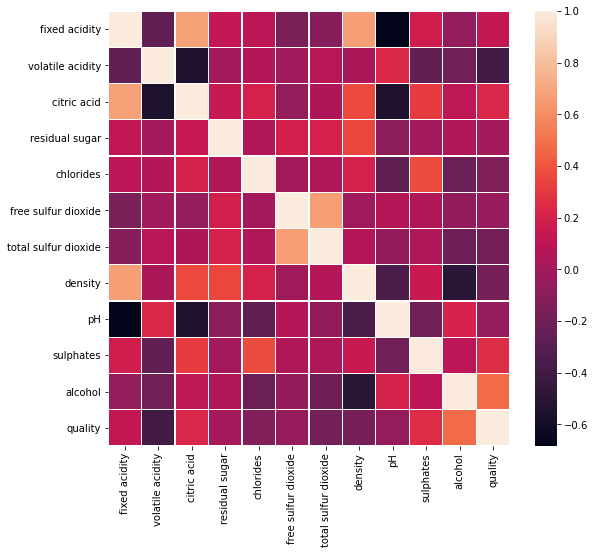

In [88]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

    fixed acidity and density are correlated
    citric acid and fixed acidity are correlated
    free sulfir dioxide and total sulfur dioxide are correlated

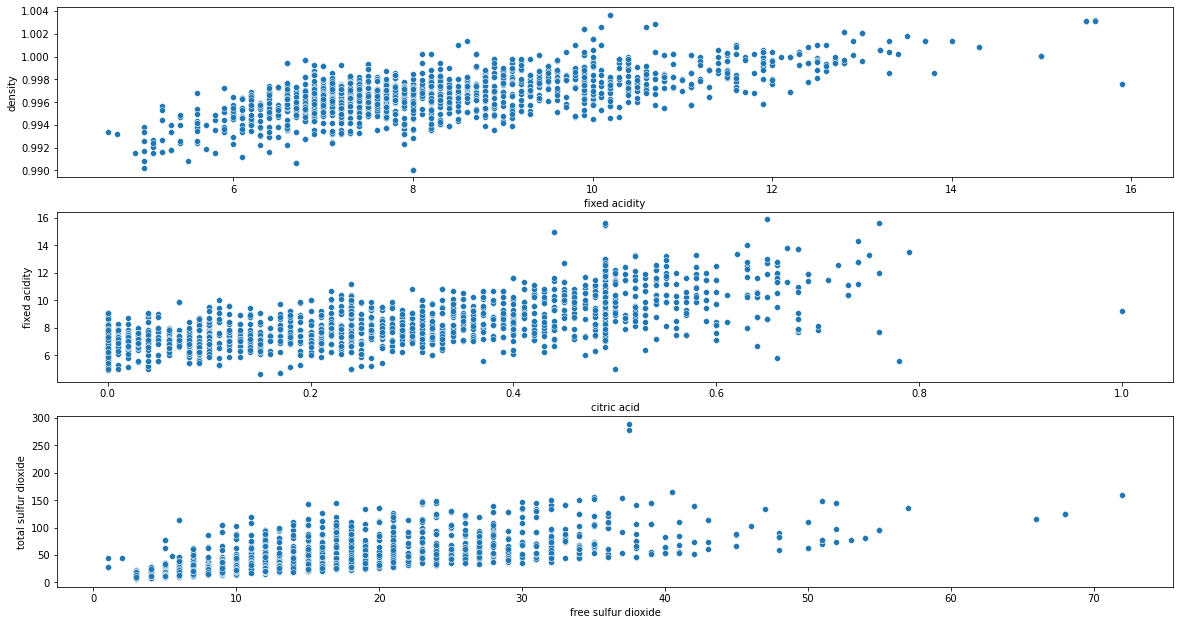

In [89]:
cols1=['fixed acidity','citric acid','free sulfur dioxide']
cols2=['density','fixed acidity','total sulfur dioxide']
counter=1
plt.figure(figsize=(20,150))
for i in range(0,len(cols1)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.scatterplot(x=cols1[i],y=cols2[i],data=df)

    fixed acidity and density are weakly correlated
    citric acid and fixed acidity are weakly correlated
    free sulfir dioxide and total sulfur dioxide are weakly correlated

In [90]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Below columns have right skewness: 

    fixed acidity           
    volatile acidity        
    residual sugar          
    chlorides               
    free sulfur dioxide     
    total sulfur dioxide    
    sulphates               
    alcohol                 

# Removing Outliers

In [91]:
for col in df.columns:
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    Barmax =  df[col].quantile(0.75) + 1.5*IQR
    Barmin =  df[col].quantile(0.25) - 1.5*IQR
    df.loc[df[col]>Barmax,col] = Barmax
    df.loc[df[col]<Barmin,col] = Barmin

# Confirming Removal of outliers

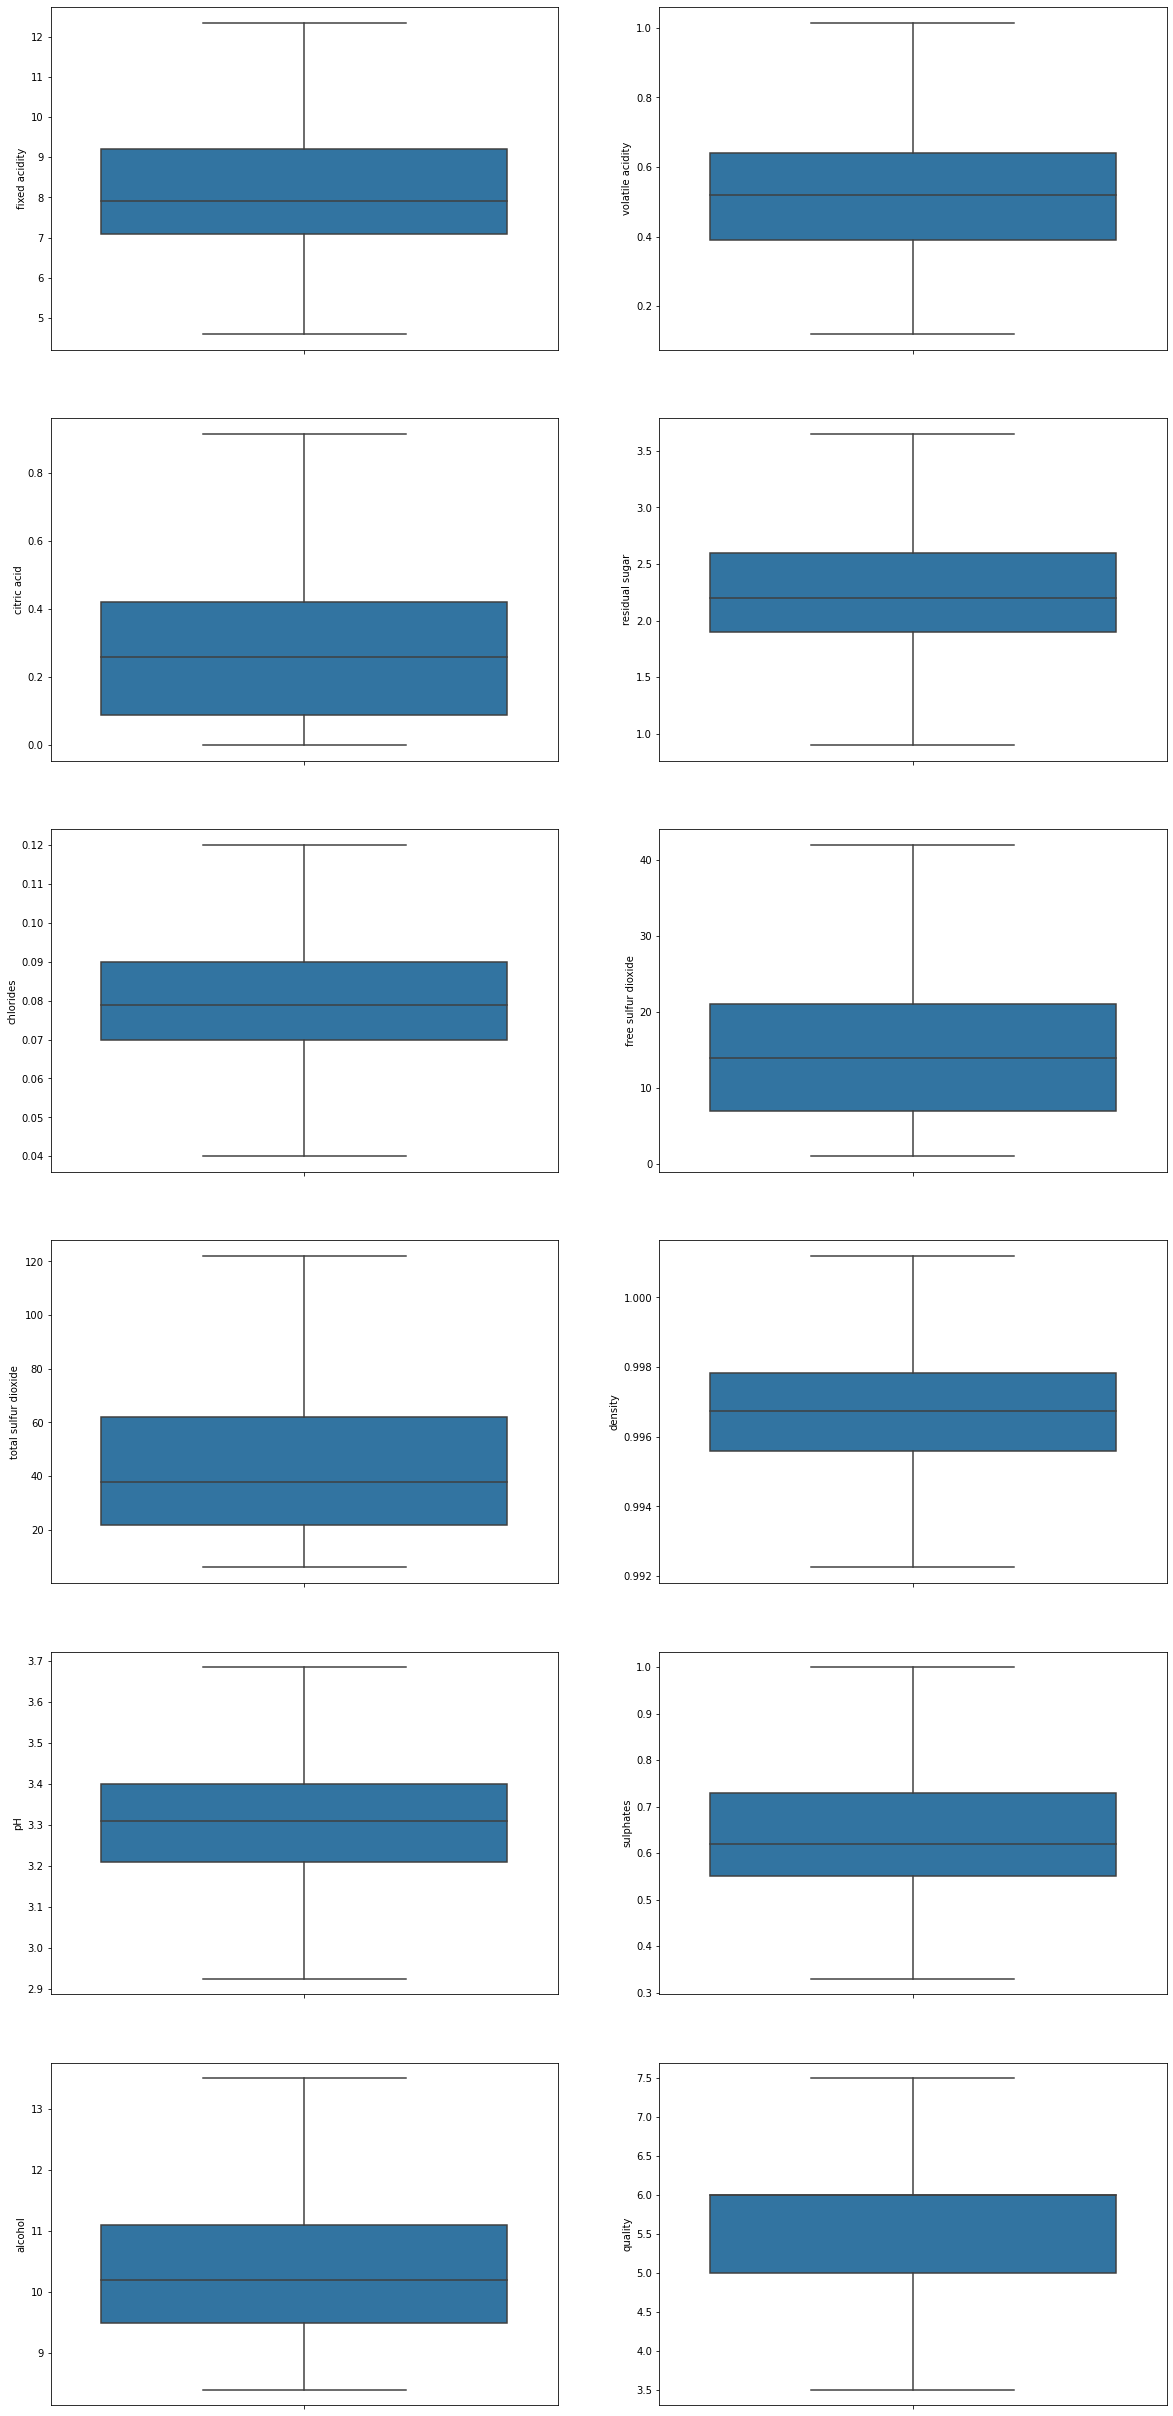

In [92]:
import seaborn as sns

counter=1;
plt.figure(figsize=(20,150))
for column in df.columns:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.boxplot(y=column,hue=column,data=df)

# Coverting quality into categorical data

In [93]:
df.loc[df['quality']<7,'quality'] = 0
df.loc[df['quality']>=7,'quality'] = 1


1 represents good quality wine
0 represents bad quality wine

<AxesSubplot:xlabel='quality', ylabel='count'>

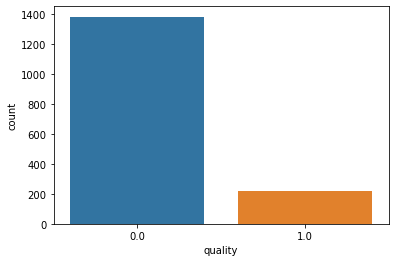

In [94]:
sns.countplot(x='quality',data=df)

target column data is highly unbalanced

In [95]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


# Scaling the data

In [96]:
fin_df  = df.drop(["quality"],axis=1) 
scaler = preprocessing.MinMaxScaler()

minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)


# Removing skewness

In [97]:

fin_df_new=power_transform(fin_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=fin_df.columns)


# Confirming removal of skewness

In [98]:
fin_df_new.skew()

fixed acidity           0.009746
volatile acidity        0.006324
citric acid             0.017273
residual sugar          0.013309
chlorides               0.001513
free sulfur dioxide    -0.021458
total sulfur dioxide   -0.014384
density                -0.000196
pH                     -0.000040
sulphates               0.036120
alcohol                 0.111929
dtype: float64

Skewness range is not between -0.5 to +0.5 for all the attributes

In [99]:
fin_df_new= fin_df_new.join(df['quality'])

# Removing duplicates

In [100]:
df_final = fin_df_new.drop_duplicates(keep='last')

# Confirming Removal of duplicates

In [101]:
duplicate = df_final.duplicated()
print(duplicate.sum())

0


Duplicates are successfully removed

# Train_Test_split

In [102]:
x = df_final.drop(["quality"],axis=1) 
y = df_final["quality"]

In [103]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 0.8918918918918919 on Random State 112


In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=112)

# Balancing the data using SMOTE

In [105]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 131
Before OverSampling, counts of label '0': 818 

After OverSampling, the shape of train_X: (1636, 11)
After OverSampling, the shape of train_y: (1636,) 

After OverSampling, counts of label '1': 818
After OverSampling, counts of label '0': 818


# Model Building

Logistic Regression

In [106]:

LogReg = LogisticRegression()
LogReg.fit(x_train_res,y_train_res)
Logpred = LogReg.predict(x_test)
acc = classification_report(y_test, Logpred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       356
         1.0       0.38      0.80      0.51        51

    accuracy                           0.81       407
   macro avg       0.67      0.81      0.70       407
weighted avg       0.89      0.81      0.83       407



Decision Tree

In [107]:

DTC = DecisionTreeClassifier()
DTC.fit(x_train_res,y_train_res)
DTCpred = DTC.predict(x_test)
acc = classification_report(y_test,DTCpred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       356
         1.0       0.31      0.51      0.39        51

    accuracy                           0.80       407
   macro avg       0.62      0.67      0.63       407
weighted avg       0.85      0.80      0.82       407



Random Forest

In [108]:

RFC = RandomForestClassifier()
RFC.fit(x_train_res,y_train_res)
RFCpred = RFC.predict(x_test)
acc = classification_report(y_test,RFCpred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       356
         1.0       0.44      0.55      0.49        51

    accuracy                           0.86       407
   macro avg       0.69      0.73      0.70       407
weighted avg       0.87      0.86      0.86       407



Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)
  
Gnbpred = gnb.predict(x_test)
acc = classification_report(y_test,Gnbpred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87       356
         1.0       0.35      0.75      0.47        51

    accuracy                           0.79       407
   macro avg       0.65      0.77      0.67       407
weighted avg       0.88      0.79      0.82       407



SVM

In [110]:
SV = SVC()
SV.fit(x_train_res,y_train_res)
SVpred = SV.predict(x_test)
acc = classification_report(y_test,SVpred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90       356
         1.0       0.42      0.73      0.53        51

    accuracy                           0.84       407
   macro avg       0.69      0.79      0.72       407
weighted avg       0.89      0.84      0.86       407



# Cross Validation Score

In [111]:
from sklearn.model_selection  import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [112]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8200211634469285


In [113]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8702002387670935


In [114]:

print(cross_val_score(gnb,x,y,cv=5).mean())

0.8377143477317126


In [115]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.8687296505317995


In [116]:

print(cross_val_score(LogReg,x,y,cv=5).mean())

0.8709463859344476


Calculating best model

    Logistic Regression = |0.81  - 0.87| = 0.06
    Decision Tree = |0.80 - 0.82| = 0.02
    Random Forest = |0.86 - 0.87| = 0.01
    Naive Bayes = |0.79 - 0.83| = 0.04
    SVM = |0.84 - 0.86| = 0.02

Best fit model is Random Forest Model

# Hypertuning

In [117]:
from sklearn.model_selection import GridSearchCV
parameter = {
   'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [118]:
GCV.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4]})

In [119]:
GCV.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1}

#  Building best build fit model

In [121]:

RFC = RandomForestClassifier(bootstrap= False,
 max_depth= 40,
 max_features= 'sqrt',
 min_samples_leaf= 1)
RFC.fit(x_train_res,y_train_res)
RFCpred = RFC.predict(x_test)
acc = classification_report(y_test,RFCpred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       356
         1.0       0.56      0.55      0.55        51

    accuracy                           0.89       407
   macro avg       0.75      0.74      0.75       407
weighted avg       0.89      0.89      0.89       407



# Roc curve

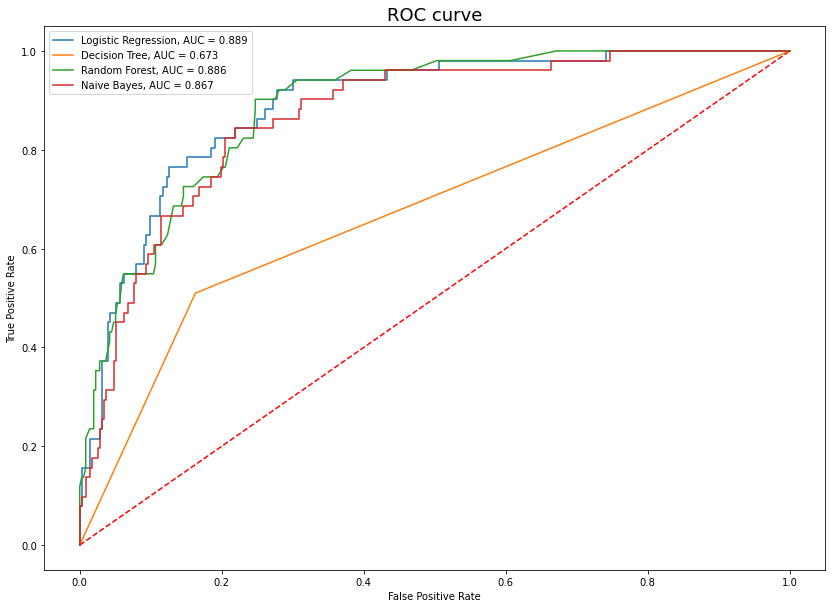

In [122]:
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN

#Logistic Regression
preds_proba_lg = LogReg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = DTC.predict_proba(x_test)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsDTC)
aucDTC = roc_auc_score(y_test, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = RFC.predict_proba(x_test)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsRFC)
aucRFC = roc_auc_score(y_test, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#Naive Bayes
preds_proba_gnb = gnb.predict_proba(x_test)
probsgnb = preds_proba_gnb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsgnb)
aucgnb = roc_auc_score(y_test, probsgnb)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucgnb,3))}')


plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

# Saving the Model

In [123]:
import joblib
joblib.dump(RFC,"Red Wine Quality.pkl")


['Red Wine Quality.pkl']